# Topic :: Clustering 

# Question 1 :
    Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

In [1]:
#importing Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name = 'data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


# Hiearchy clustering 

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [6]:
trans = MinMaxScaler()

In [7]:
trans1 = StandardScaler()

In [8]:
trans_df = trans.fit_transform(df)
trans_df

array([[0.00000000e+00, 1.65077268e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.43742464e-01, 0.00000000e+00],
       [2.48756219e-04, 1.12878760e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.39884254e-01, 0.00000000e+00],
       [4.97512438e-04, 2.42568502e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.47841813e-01, 0.00000000e+00],
       ...,
       [9.99502488e-01, 4.31694976e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.68796721e-01, 1.00000000e+00],
       [9.99751244e-01, 3.22018866e-02, 0.00000000e+00, ...,
        1.88679245e-02, 1.68676151e-01, 0.00000000e+00],
       [1.00000000e+00, 1.76908304e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.68314444e-01, 0.00000000e+00]])

In [9]:
trans1_df = trans1.fit_transform(df)
trans1_df

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

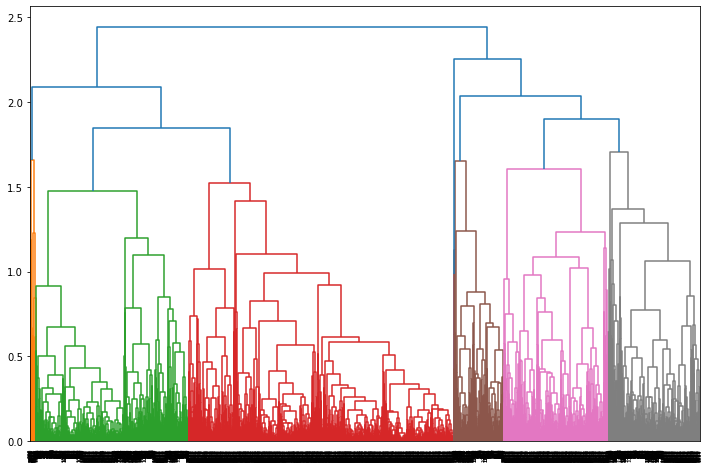

In [10]:
#dendogram
from scipy.cluster.hierarchy import linkage
plt.figure(figsize = (12,8))
z = linkage(trans_df, method="complete",metric="euclidean")
dendogram = sch.dendrogram(sch.linkage(trans_df,'complete'))

In [11]:
import warnings 
warnings.filterwarnings('ignore')
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=5,linkage = 'complete',affinity="euclidean").fit(trans_df)
cluster_labels = pd.Series(h_complete.labels_)
cluster_labels
df['clust'] = cluster_labels
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [12]:
data = df[(df.clust==4)]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,4
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,4
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,4
18,19,91473,0,3,1,1,27408,17,0,0,6903,1,4
19,20,23354,0,3,1,1,10447,5,0,0,6896,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1638,194949,0,1,1,1,10121,13,4621,10,4930,1,4
1667,1683,25688,2396,1,1,1,3103,10,0,0,4754,1,4
1669,1685,288379,0,1,1,1,15942,8,1442,5,4741,1,4
1698,1714,192108,1000,1,1,1,10200,3,200,2,4656,1,4


In [13]:
data = df[(df.clust ==1)]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,1
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,1
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [14]:
data = df[(df.clust==1)]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,1
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,1
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [15]:
data = df[(df.clust==2)]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1,2
3235,3257,287033,0,1,1,1,26161,58,12873,53,2272,1,2
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,2
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1,2


In [16]:
data = df[(df.clust==0)]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,0
16,17,51890,0,4,1,1,48963,16,0,0,6910,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,0
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0


# KMeans clustering 

In [17]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans

In [18]:
kc_data = pd.read_excel('EastWestAirlines.xlsx',sheet_name ='data')
kc_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [27]:
trans = MinMaxScaler()
trans_df = trans.fit_transform(df)
trans_df

array([[0.00000000e+00, 1.65077268e-02, 0.00000000e+00, ...,
        8.43742464e-01, 0.00000000e+00, 2.50000000e-01],
       [2.48756219e-04, 1.12878760e-02, 0.00000000e+00, ...,
        8.39884254e-01, 0.00000000e+00, 2.50000000e-01],
       [4.97512438e-04, 2.42568502e-02, 0.00000000e+00, ...,
        8.47841813e-01, 0.00000000e+00, 2.50000000e-01],
       ...,
       [9.99502488e-01, 4.31694976e-02, 0.00000000e+00, ...,
        1.68796721e-01, 1.00000000e+00, 0.00000000e+00],
       [9.99751244e-01, 3.22018866e-02, 0.00000000e+00, ...,
        1.68676151e-01, 0.00000000e+00, 2.50000000e-01],
       [1.00000000e+00, 1.76908304e-03, 0.00000000e+00, ...,
        1.68314444e-01, 0.00000000e+00, 2.50000000e-01]])

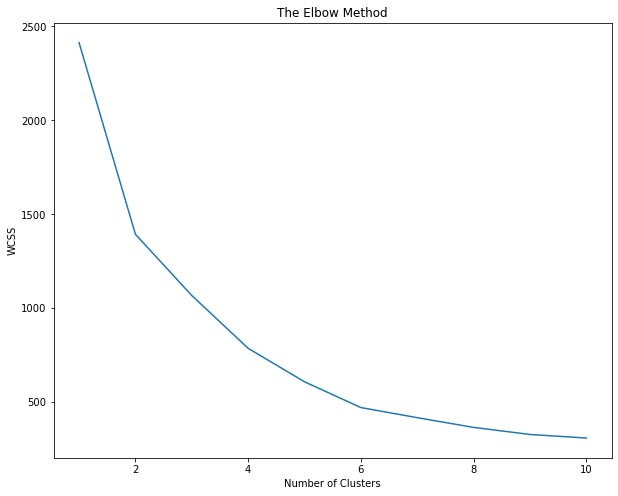

In [28]:
fig = plt.figure(figsize=(10, 8))
WCSS = []    
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(trans_df)
    WCSS.append(clf.inertia_) # inertia another name for wcss
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [22]:
#From above we can say there are 6 clusters

In [29]:
clf = KMeans(n_clusters=6)
y_Kmeans = clf.fit_predict(trans_df)

In [30]:
y_Kmeans
clf.labels_

array([5, 5, 5, ..., 2, 0, 0])

In [31]:
clf.cluster_centers_

array([[ 8.00207185e-01,  2.08090406e-02,  8.47149727e-03,
         5.14375562e-02,  8.53548967e-03,  1.57232704e-03,
         1.67102887e-02,  8.07998496e-02,  6.94107035e-03,
         1.12732882e-02,  2.39360618e-01, -2.22044605e-16,
         2.56289308e-01],
       [ 4.04765766e-01,  7.38484569e-02,  6.18416471e-03,
         6.66206262e-01,  9.20810313e-04,  6.44567219e-03,
         1.25283911e-01,  2.01593216e-01,  7.32518842e-03,
         1.23701310e-02,  5.77744412e-01, -3.88578059e-16,
         2.50000000e-01],
       [ 6.82484178e-01,  3.48805535e-02,  1.74104693e-02,
         1.66819853e-01,  5.51470588e-03,  3.46944695e-18,
         4.68440159e-02,  1.38038646e-01,  2.75748417e-02,
         4.69617092e-02,  3.48443772e-01,  1.00000000e+00,
         1.83823529e-03],
       [ 1.75840764e-01,  7.03148045e-02,  4.29472528e-02,
         9.98376623e-02,  2.59740260e-02,  1.62337662e-03,
         4.12064991e-02,  1.37458472e-01,  3.02218711e-02,
         5.67262926e-02,  7.78078505e

In [32]:
clf.inertia_

471.03530280860997

In [34]:
md = pd.Series(y_Kmeans)
kc_data['clust'] = md
kc_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,5
1,2,19244,0,1,1,1,215,2,0,0,6968,0,5
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,5
3,4,14776,0,1,1,1,500,1,0,0,6952,0,5
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [36]:
kc_data.groupby(kc_data.clust).mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,,
0,3217.832884,35476.043127,94.440252,1.205750,1.017071,1.006289,4406.252471,6.948787,213.902965,0.597484,1987.256963,0.0
1,1628.158379,125899.655617,68.941068,3.664825,1.001842,1.025783,33035.488029,17.337017,225.740331,0.655617,4793.812155,0.0
2,2744.586397,59465.693015,194.091912,1.667279,1.011029,1.000000,12352.064338,11.871324,849.773897,2.488971,2891.992647,1.0
3,707.879870,119875.350649,478.775974,1.399351,1.051948,1.006494,10865.535714,11.821429,931.347403,3.006494,6455.383117,1.0
4,1389.731320,118385.729730,163.246423,4.139905,1.001590,1.039746,52055.343402,21.104928,828.023847,2.496025,5227.686804,1.0
5,1167.635731,49591.404872,90.529002,1.116009,1.017401,1.001160,3376.904872,6.814385,242.636891,0.721578,5574.878190,0.0


Text(0.5, 1.0, 'Clusters using kmeans')

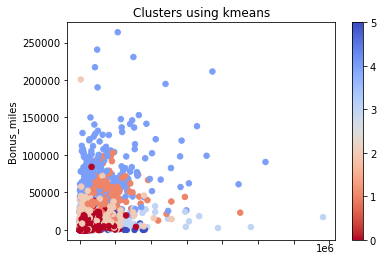

In [38]:
kc_data.plot(x="Balance",y = "Bonus_miles",c=clf.labels_,kind = "scatter",s = 30,cmap=plt.cm.coolwarm_r)
plt.title('Clusters using kmeans')

In [39]:
WCSS

[2413.1826742966277,
 1393.4262451055943,
 1067.6169646294838,
 786.4196921240017,
 608.3184533783019,
 471.03484625582024,
 417.30776737644453,
 365.58732684415634,
 327.86997585795416,
 308.9653148948181]

# DB Scan

In [40]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [42]:
db_data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
db_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [43]:
array = db_data.values
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [44]:
stscalar = StandardScaler().fit(array)
X = stscalar.transform(array)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [45]:
dbscan = DBSCAN(eps = 0.475,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.475)

In [46]:
dbscan.labels_ #-1 implies Noise

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [47]:
c1 = pd.DataFrame(dbscan.labels_,columns=['cluster'])
c1

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,4
3995,-1
3996,-1
3997,0


In [48]:
pt = pd.concat([db_data,c1],axis = 1)
pt

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,4
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,-1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,-1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


Text(0.5, 1.0, 'Clusters using DBScan')

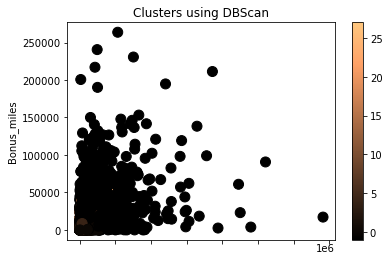

In [52]:
import matplotlib.pyplot as plt 
pt.plot(x="Balance",y ="Bonus_miles",c=dbscan.labels_ ,kind="scatter",s=100 ,cmap=plt.cm.copper) 
plt.title('Clusters using DBScan') 

In [50]:
d1 = dbscan.labels_
d1

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [ ]:
#hence hiearchy method is best among the other methods